### Day 1: Analysing Personal Nextflix Data
It has been a considerable amount of time since I started learning Data Science. However, I have been very inconsistent and have not felt like I my progress is enough due to not having taken a _"real world"_ project in my own hands. Well, not anymore! I stumbled on this gem, [Python Data Science December](https://medium.com/python-point/python-data-science-december-ff4aa9e4d5e6) decided to replicate the projects in the series. Today, we are analyzing my family's Netflix data. I requested my family's data from Netflix and in this project, I'm going to clean it and visualize it using Python Pandas and Matplotlib libraries. 

In [59]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df = pd.read_csv('ViewingActivity.csv')

In [3]:
df.shape

(905, 10)

Immediately we notice that we don't have too much data points. But these will do with the simple analysis we want to do. Now let's look at our table.

In [8]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2024-08-12 09:10:40,00:14:12,NaN,Teen Titans Go!: Season 5: The Power of Shrimp...,NaN,Samsung CE 2020 Kant-S2 DTV Smart TV,00:14:16,00:14:16,RW (Rwanda)
1,Kids,2024-08-12 08:49:47,00:20:50,NaN,Teen Titans Go!: Season 5: Little Elvis / The ...,NaN,Samsung CE 2020 Kant-S2 DTV Smart TV,00:20:54,00:20:54,RW (Rwanda)
2,Kids,2024-08-12 08:28:57,00:20:49,NaN,Teen Titans Go!: Season 5: The Fight / Genie P...,NaN,Samsung CE 2020 Kant-S2 DTV Smart TV,00:20:52,00:20:52,RW (Rwanda)
3,Kids,2024-08-12 08:27:52,00:01:02,NaN,Teen Titans Go!: Season 5: Tower Renovation / ...,NaN,Samsung CE 2020 Kant-S2 DTV Smart TV,00:21:13,00:21:13,RW (Rwanda)
4,Kids,2024-08-11 20:32:26,00:20:08,NaN,Teen Titans Go!: Season 5: Tower Renovation / ...,NaN,Samsung CE 2020 Kant-S2 DTV Smart TV,00:20:12,Not latest view,RW (Rwanda)


In [10]:
df.sample(n=5)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
439,Quin,2024-04-20 07:03:07,00:40:39,Autoplayed: user action: User_Interaction;,Killing Eve: Season 1: Don't I Know You? (Epis...,NaN,TCL Malone HDR10 Smart TV,00:41:10,00:41:10,US (United States)
488,Quin,2024-04-12 01:25:45,01:12:37,Autoplayed: user action: User_Interaction;,The Tearsmith,NaN,TCL Malone HDR10 Smart TV,01:38:42,01:38:42,US (United States)
211,Quin,2024-06-21 01:47:36,00:00:06,NaN,Sex and the City: Season 1: Sex and the City (...,NaN,TCL Malone HDR10 Smart TV,00:00:43,00:00:43,US (United States)
549,Quin,2024-04-07 23:09:54,00:51:21,NaN,The Brothers Sun: Season 1: Protect the Family...,NaN,TCL Malone HDR10 Smart TV,00:51:28,00:51:28,US (United States)
827,Sando,2024-04-24 01:37:56,00:18:15,NaN,The Upshaws: Part 1: Birthday B.S. (Episode 1),NaN,TCL Malone HDR10 Smart TV,00:24:55,00:24:55,US (United States)


In [10]:
df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [4]:
df["Profile Name"].unique()

array([nan, 'HOOK', 'TEASER_TRAILER', 'TRAILER', 'CINEMAGRAPH', 'RECAP'],
      dtype=object)

In [12]:
df["Country"].unique()

array(['RW (Rwanda)', 'US (United States)'], dtype=object)

In [13]:
df["Device Type"].unique()

array(['Samsung CE 2020 Kant-S2 DTV Smart TV',
       'TCL Malone HDR10 Smart TV', 'Sony UNICORN4K Smart TV'],
      dtype=object)

In [6]:
df['Supplemental Video Type'].value_counts()

Supplemental Video Type
HOOK              302
TRAILER            81
TEASER_TRAILER     21
RECAP               4
CINEMAGRAPH         1
Name: count, dtype: int64

From research, we find out that Netflix give "Supplemental Video Type" values to teasers, hooks, and trailers and not to actual viewed content, which is represented by the rows with "Nan" in their "Supplemental Video Type" column. So we will remove these and remain with actual view activity. 

In [17]:
df = df.loc[df["Supplemental Video Type"].isnull()]

Now let us examine the datatypes of our columns.

In [14]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

We need to transform "Start TIme" and "Duration" data into the appropriate datatypes, datetime and timedelta respectively.

In [18]:
df["Start Time"] = pd.to_datetime(df["Start Time"], utc=True)
df["Duration"] = pd.to_timedelta(df["Duration"])
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

In [9]:
df.sample(n=5) 

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
394,Quin,2024-05-05 17:32:08,00:26:02,Autoplayed: user action: User_Interaction;,"Killing Eve: Season 4: Oh Goodie, I'm the Winn...",NaN,TCL Malone HDR10 Smart TV,00:29:36,Not latest view,US (United States)
594,Quin,2024-04-01 23:20:59,00:01:41,Autoplayed: user action: User_Interaction;,Mea Culpa,NaN,TCL Malone HDR10 Smart TV,00:01:41,00:01:41,US (United States)
567,Quin,2024-04-03 02:39:39,00:25:54,NaN,Physical: 100: Season 2: 1/100 (Episode 9),NaN,TCL Malone HDR10 Smart TV,00:42:37,Not latest view,US (United States)
668,Sando,2024-07-01 21:08:20,00:31:15,Autoplayed: user action: User_Interaction;,This Is Us: Season 1: The Right Thing to Do (E...,NaN,TCL Malone HDR10 Smart TV,00:31:16,Not latest view,US (United States)
811,Sando,2024-04-25 01:57:26,00:25:27,NaN,The Upshaws: Part 2: Duct Up (Episode 5),NaN,TCL Malone HDR10 Smart TV,00:25:31,00:25:31,US (United States)


## Who has watched how many number of times?
We have four Profiles, "Quin", "Sando", "Nziza", and "Kids", so let's go ahead and plot a chart to see who watches our Nextflix more frequently than the others.

In [12]:
df["Profile Name"].value_counts()

Profile Name
Quin     636
Sando    249
Nziza     12
Kids       8
Name: count, dtype: int64

It looks like like "Quin" is the most enthusiastic watcher, followed by "Sando", with Kids barely leaving their baby shark YouTube videos to concern themselves with Netflix. Let's plot our findings.

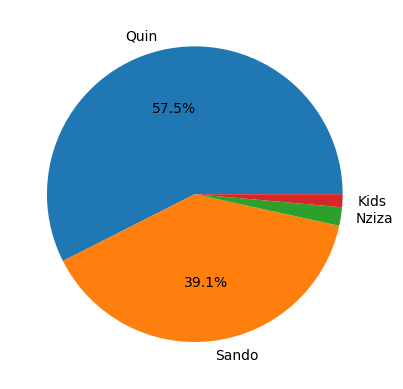

In [19]:
%matplotlib inline
values = df["Profile Name"].value_counts()
labels = values.keys()

# Hide labels with less than 5 percent
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 5 else '' 

plt.pie(values, labels=labels, autopct=autopct_func)
plt.show()

On the pie chart above, we can see that Quin and Sando are almost exclusively running the show, with over 96.6% of the total times content was watched having been either of their profiles signed in. But it doesn't end there. We need to check the total amount of time that each of us have spent watching Netflix on this account.

## Total time each profile has watched (in hours).

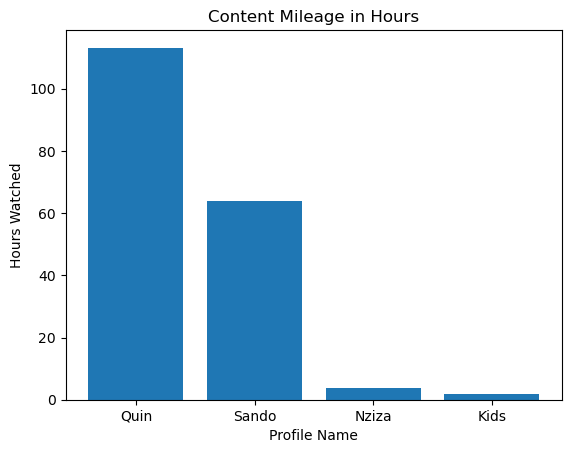

In [26]:
watch_time = df.groupby(["Profile Name"], as_index=False)["Duration"].sum()  # Group by profile
watch_time["Duration"] = watch_time["Duration"].dt.total_seconds() / 3600   # Get the duration in hours
watch_time = watch_time.sort_values("Duration", ascending=False)          # Sort by duration 

# Plot on a bar chart
plt.bar(watch_time["Profile Name"], height=watch_time["Duration"])
plt.title("Content Mileage in Hours")
plt.xlabel("Profile Name")
plt.ylabel("Hours Watched")
plt.show()


## Average watching time (per Profile)?
Now we need to see who's the final boss of binge and who gets distracted mid-episode. We are going to calculate the average watching time in minutes of each profile per sitting.
_Average Watching Time = Total watching time(per profile) / Number of times they watched(occurences in the row)_


In [27]:
watch_time["Times watched"] = df["Profile Name"].value_counts().tolist()
watch_time["Average Time"] = watch_time["Duration"] / watch_time["Times watched"] * 60 # In minutes
watch_time

,Profile Name,Duration,Times watched,Average Time
2,Quin,113.158333,285,23.822807
3,Sando,63.865000,194,19.752062
1,Nziza,3.773889,10,22.643333
0,Kids,1.976667,7,16.942857


Now let's plot the data!

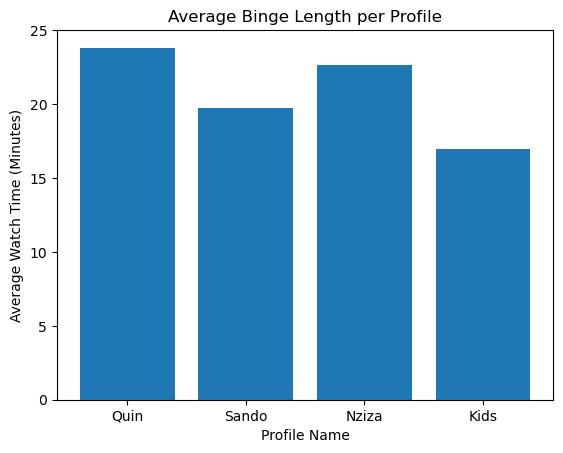

In [32]:
plt.bar(watch_time["Profile Name"], height=watch_time["Average Time"])
plt.title("Average Binge Length per Profile")
plt.xlabel("Profile Name")
plt.ylabel("Average Watch Time (Minutes)")
plt.show()


Now let's look at what device is abused by the Netflix warriors in our home.

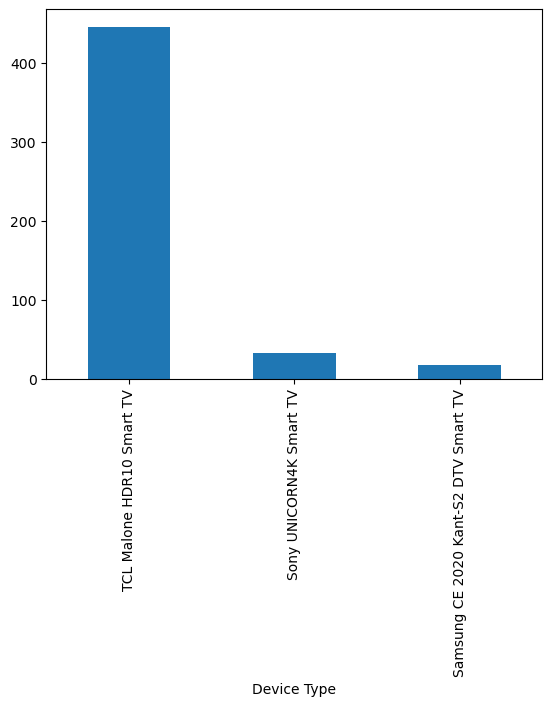

In [35]:
df["Device Type"].value_counts().plot(kind='bar')
plt.show()

It looks like we've only watched Netflix on our TV's, with the one in the living room taking the bigger part of our watching burden. Good to know that none of us is watching on their work computers. Way to go!

Now let's look at the countries in which we have utilized Netlix.

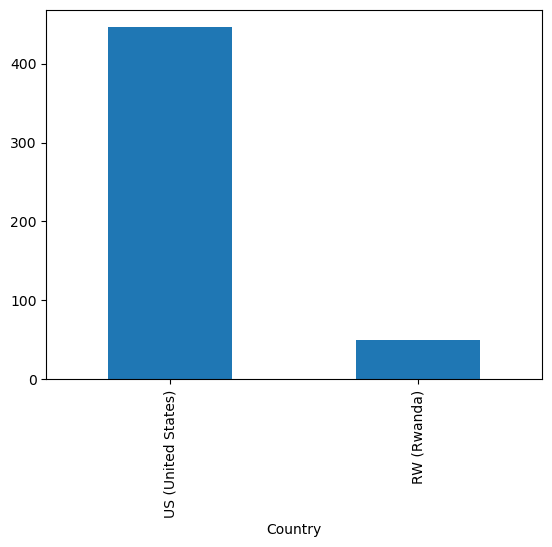

In [28]:
df['Country'].value_counts().plot(kind='bar')
plt.show()

The plot shows us that we've generally watched more times in the States than in Rwanda, which makes sense since we don't spend that much time in our home country. Now let's analyze our most watched titles.


Now let's look at our search history. We will have to import a new CSV file downloaded from Netflix for this.


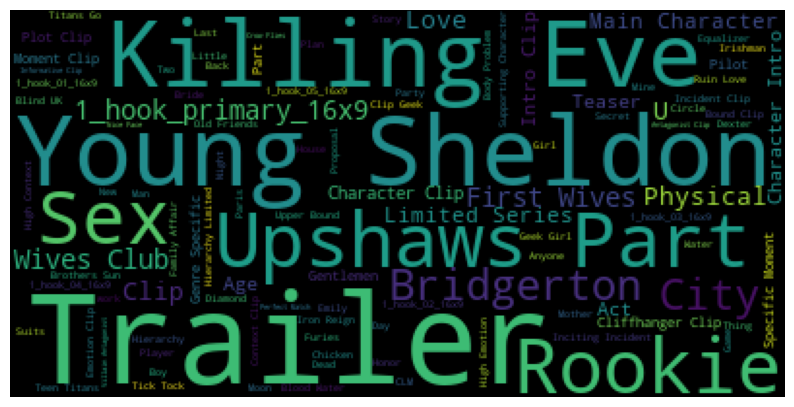

In [73]:
words = " ".join(i for i in df.Title)
stopwords = set(STOPWORDS)
stopwords.update(["Season", "Episode"])
wc = WordCloud(stopwords=stopwords, background_color="black").generate(words)
plt.figure(figsize=(10, 8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [108]:
df = pd.read_csv("SearchHistory.csv")
df

,Profile Name,Country Iso Code,Device,Is Kids,Query Typed,Displayed Name,Action,Section,Utc Timestamp
0,Sando,US,Smart TV,0,thi,NaN,play,title_results,2024-06-29 00:54:00
1,Sando,US,Smart TV,0,thi,NaN,play,title_results,2024-06-28 22:11:53
2,Sando,US,Smart TV,0,thi,NaN,select,title_results,2024-06-28 22:11:15
3,Sando,US,Smart TV,0,mo,Mother of the Bride,play,title_results,2024-05-11 14:17:52
4,Sando,US,Smart TV,0,mo,Mother of the Bride,select,title_results,2024-05-11 14:17:48
...,...,...,...,...,...,...,...,...,...
81,Quin,US,Smart TV,0,gbl,NaN,select,title_results,2024-03-24 13:47:14
82,Quin,US,Smart TV,0,g,NaN,play,title_results,2024-03-24 05:51:29
83,Quin,US,Smart TV,0,g,NaN,select,title_results,2024-03-24 05:51:25
84,Quin,US,Smart TV,0,g,NaN,play,title_results,2024-03-24 02:40:53


We need to know who is more likely to just watch whatever hot series Netflix has put on the front page and who searches for "Man on Fire" hoping Netflix has not executed their _"we are taking away this movie in 3 days"_ threat. 

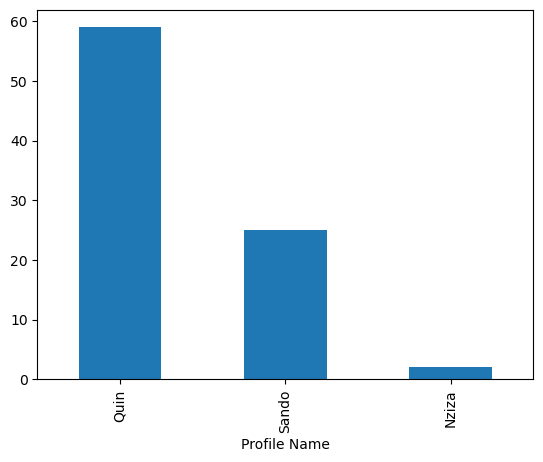

In [94]:
df["Profile Name"].value_counts().plot(kind="bar")
plt.show()

It looks like Quin searches more often and kids have never bothered practicing their ABC's on the annoying TV remote. But since Quin already uses the account more often than the rest, we need to make sure that we are not biased if we say she is more likely to be choosy with her binge choices.

In [95]:
df = df.sort_values(by="Utc Timestamp", ascending=False)

Let's calculate and plot searches per week per Profile Name.

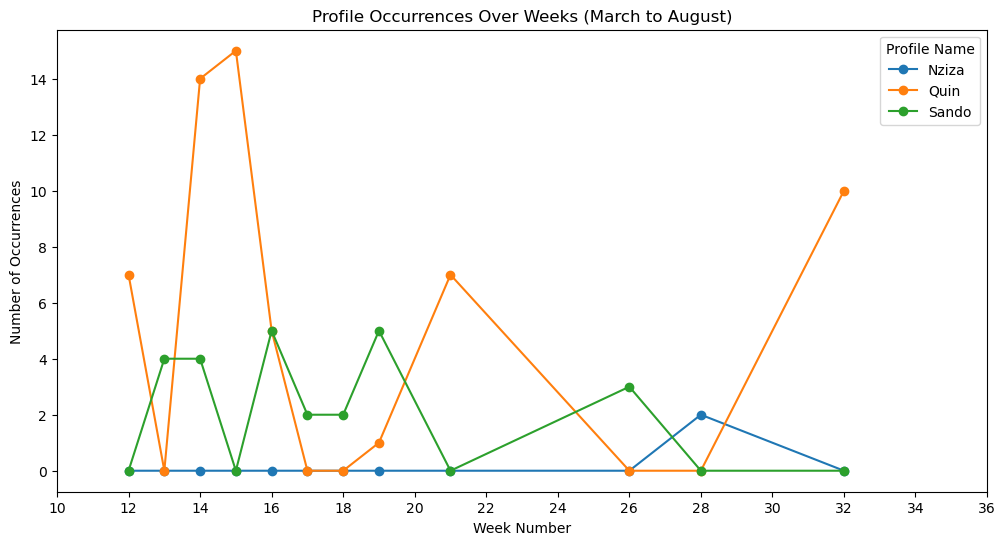

In [117]:
# Convert 'Utc Timestamp' to datetime
df["Datetime"] = pd.to_datetime(df["Utc Timestamp"])

# Extract the week number from the 'Datetime'
df["Week"] = df["Datetime"].dt.isocalendar().week

# Group by 'Profile Name' and 'Week', and count the occurrences
weekly_counts = df.groupby(["Profile Name", "Week"]).size().unstack(fill_value=0)

# Plot the result
weekly_counts.T.plot(figsize=(12, 6), marker="o")  # Transpose to have weeks on the x-axis

# Add labels and title
plt.title("Profile Occurrences Over Weeks (March to August)")
plt.xlabel("Week Number")
plt.xticks(ticks=range(10, 38, 2))
plt.ylabel("Number of Occurrences")
plt.legend(title="Profile Name")
plt.show()


It looks like Quin, the Netflix queen is also the search queen. Finally, let's look at for the most Displayed Name.

In [121]:
df["Displayed Name"].isnull().value_counts()

Displayed Name
True     54
False    32
Name: count, dtype: int64

Since we have empty occurences of Displayed Name, we'll have to drop those columns.

In [128]:
df.dropna(subset="Displayed Name", inplace=True)

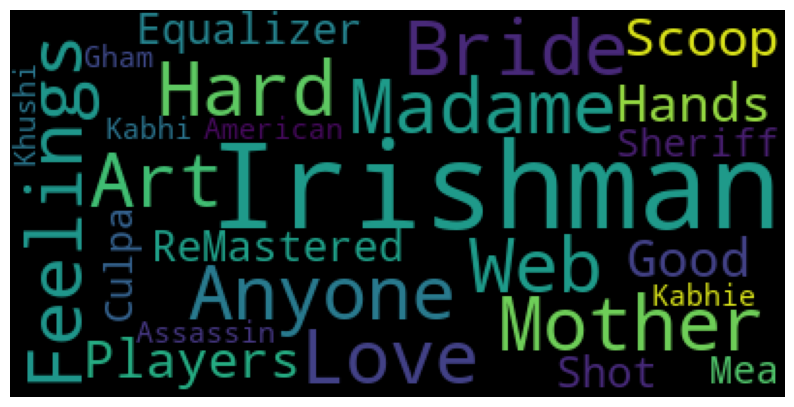

In [129]:
words = " ".join(i for i in df["Displayed Name"])
stopwords = set(STOPWORDS)
wc = WordCloud(stopwords=stopwords, background_color="black").generate(words)
plt.figure(figsize=(10, 8))
plt.imshow(wc)
plt.axis("off")
plt.show()

See you on Day 2!